# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [1]:
import ROOT

Welcome to JupyROOT 6.30/07


In [2]:
treename = "dataset"
filename = "/uscms_data/d3/dconcion/final_assignment/assignment/example_file.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [8]:
df_filter = df.Define("vec1_no_noise", "vec1[(vec2*vec2)<0.1]")

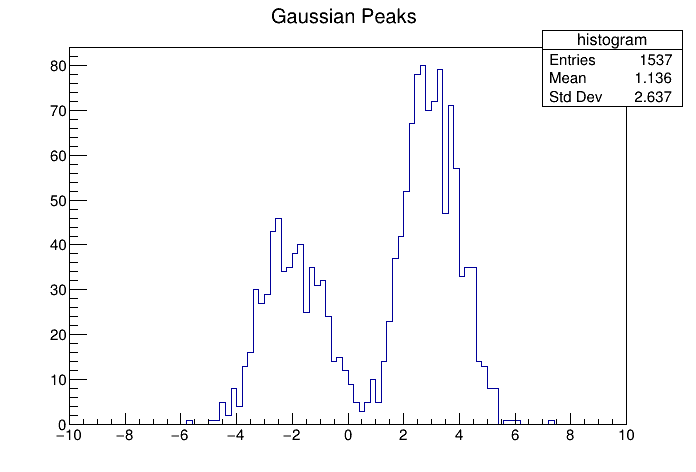

In [18]:
c = ROOT.TCanvas()
h = df_filter.Histo1D(("histogram", "Gaussian Peaks", 100, -10, 10), "vec1_no_noise")
h.Draw()
c.Draw()

In [22]:
# where are the peaks?
# The peaks of the mixture of gaussians are at around (-2,46) and (3,80)

In [24]:
# was not sure how to do this so I got some help online
spectrum = ROOT.TSpectrum()
n_peaks = spectrum.Search(h.GetPtr(), 2, "", 0.05) 
peaks = spectrum.GetPositionX()

for i in range(n_peaks):
    print(f"Peak {i+1}: x = {peaks[i]}")

Peak 1: x = 2.900000000000001
Peak 2: x = -2.4999999999999996
